In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

data = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Cancer Data Analysis\\cancer_dataset.csv")

In [4]:
# shape of the dataset 
data.shape

(10000, 20)

In [5]:
# data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [9]:
# check for missing values 
data.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [10]:
# view rows containing missing values 
data[data['Cause_of_Death'].isna()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [11]:
# check for duplicates 
data.duplicated().sum()

np.int64(0)

In [12]:
# change data types 
import datetime as dt 
# convert `Diagnosis_Date` column to datetime data type 
data['Diagnosis_Date'] = pd.to_datetime(data['Diagnosis_Date'])

# convert `Diagnosis_Date` column to datetime data type 
data['Treatment_Start_Date'] = pd.to_datetime(data['Treatment_Start_Date'])

In [14]:
# view changed columns 
data[['Treatment_Start_Date', 'Diagnosis_Date']].dtypes

Treatment_Start_Date    datetime64[ns]
Diagnosis_Date          datetime64[ns]
dtype: object

In [15]:
# create categories 
# check for the number of unique ages in the age category 
print("Number Of Unique Ages: ", data['Age'].nunique())

# print the unique ages in the age category 
print("Unique Ages: ", data['Age'].unique())

Number Of Unique Ages:  72
Unique Ages:  [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]


In [16]:
data['Age'].describe()

count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [17]:
# create bins for the various age categories 
twenty_fifth = data['Age'].quantile(0.25)
median = data['Age'].median()
seventy_fifth = data['Age'].quantile(0.75)
maximum = data['Age'].max()

# create labels and bins for the various age categories 
labels = ['young_adult', 'middle_age', 'older_adult', 'elderlies']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

# create a category column for age 
data['Age_Category'] = pd.cut(data['Age'], labels=labels, bins=bins)

In [18]:
data['Age_Category']

0       older_adult
1       young_adult
2         elderlies
3         elderlies
4        middle_age
           ...     
9995      elderlies
9996     middle_age
9997    older_adult
9998    older_adult
9999    young_adult
Name: Age_Category, Length: 10000, dtype: category
Categories (4, object): ['young_adult' < 'middle_age' < 'older_adult' < 'elderlies']

In [19]:
# fix incosistencies 
for x in data.columns:
    print(data[x].unique())

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
['Female' 'Male' 'Other']
['Emirati' 'Expatriate']
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00',
 ...
 '2018-01-18 00:00:00', '2020-12-30 00:00:00', '2020-12-15 00:00:00',
 '2018-10-05 00:00:00', '2020-07-25 00:00:00', '2018-05-14 00:00:00',
 '2016-06-09 00:00:00', '2019-06-21 00:00:00', '2022-09-18 00:00:00',
 '2016-06-11 00:00:00']
Length: 3151, dtype: datetime64[ns]
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 

In [20]:
# statistical view of the categorical column 
data.select_dtypes(include='object').describe()

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,992,10000,5953,10000
unique,10000,3,2,7,8,4,4,4,8614,3,867,2,3,3,5
top,PAT010000,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. ZA47,Recovered,2016-03-07 00:00:00,Complications,Non-Smoker,Hypertension,South Asian
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,3,507,5038,2945,2083


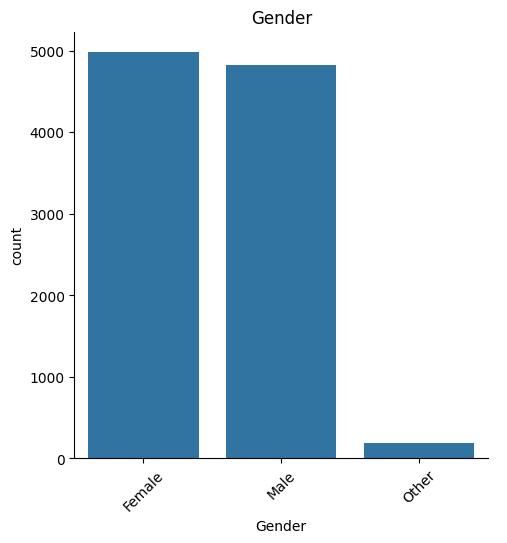

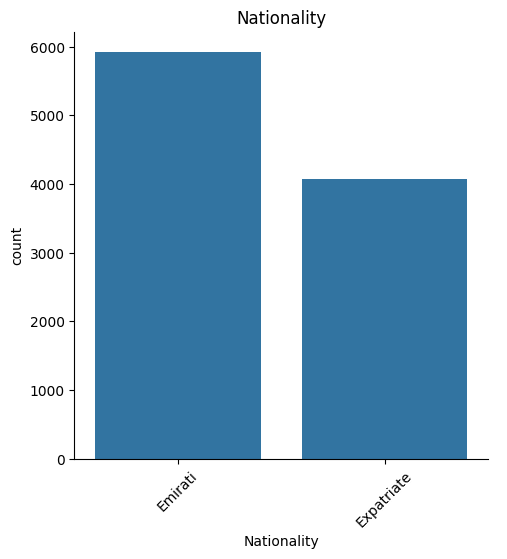

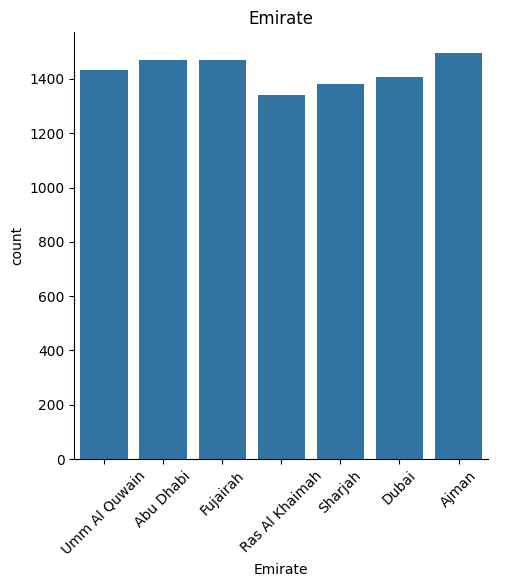

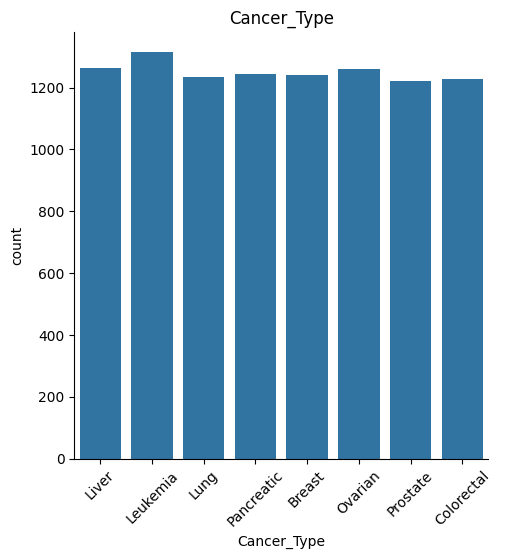

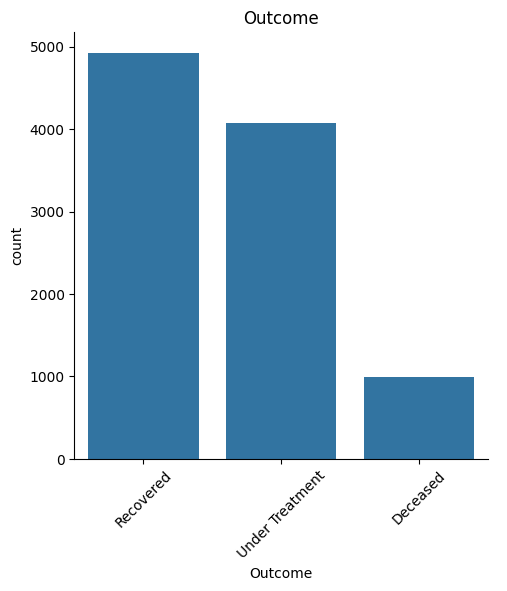

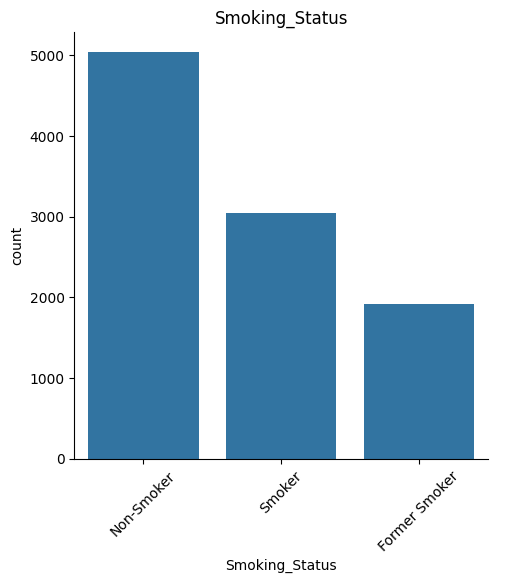

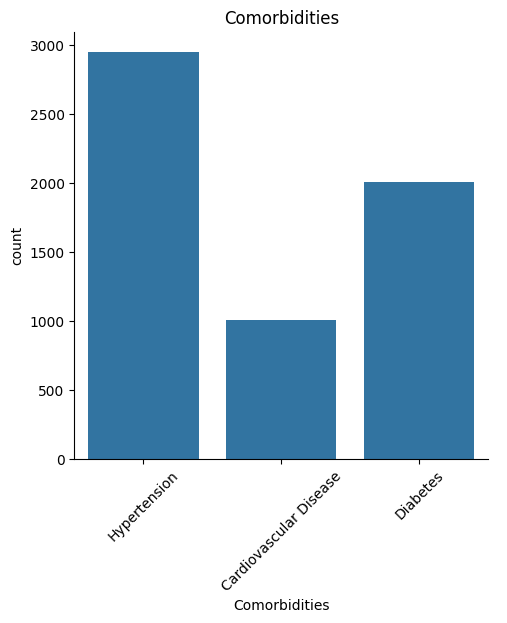

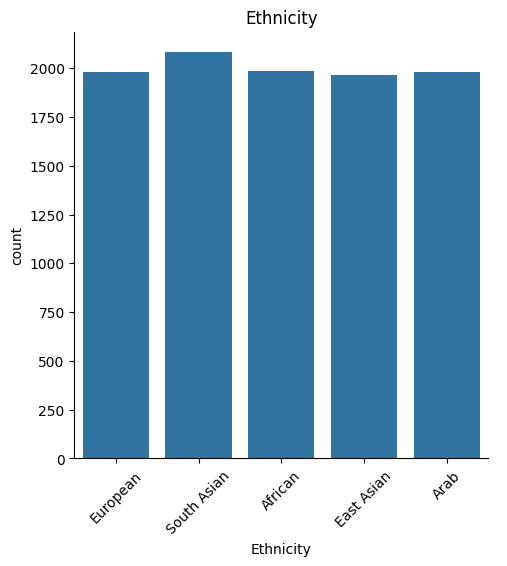

In [22]:
column_list = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Outcome', 'Smoking_Status', 'Comorbidities', 'Ethnicity']

def plot_bar_graph():
    for c in column_list: 
        g = sns.catplot(x=c, data=data, kind='count')
        g.set_xticklabels(rotation=45)
        plt.title(c)
        plt.show()

plot_bar_graph()

In [23]:
# statistical view of the numeric columns 
data.describe()

,Age,Diagnosis_Date,Treatment_Start_Date,Weight,Height
count,10000.000000,10000,10000,10000.000000,10000.000000
mean,53.539700,2019-08-08 15:31:58.080000,2019-11-05 23:51:38.880000,69.550000,169.347500
min,18.000000,2015-01-01 00:00:00,2015-01-07 00:00:00,18.000000,131.000000
25%,36.000000,2017-04-05 00:00:00,2017-07-05 00:00:00,60.000000,163.000000
50%,53.000000,2019-08-26 12:00:00,2019-11-24 00:00:00,70.000000,169.000000
75%,72.000000,2021-11-22 00:00:00,2022-02-18 00:00:00,80.000000,176.000000
max,89.000000,2024-03-01 00:00:00,2024-08-23 00:00:00,122.000000,208.000000
std,20.757324,NaN,NaN,14.933339,10.070118


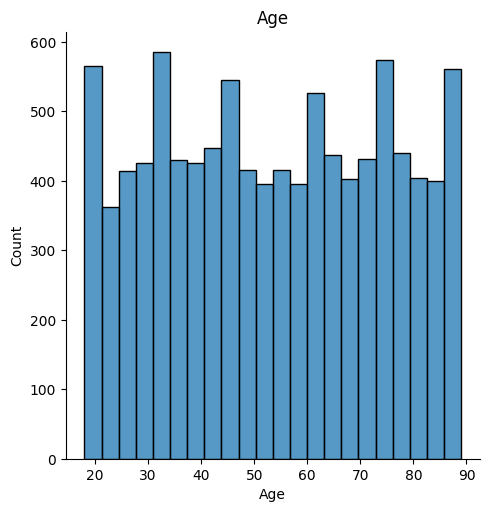

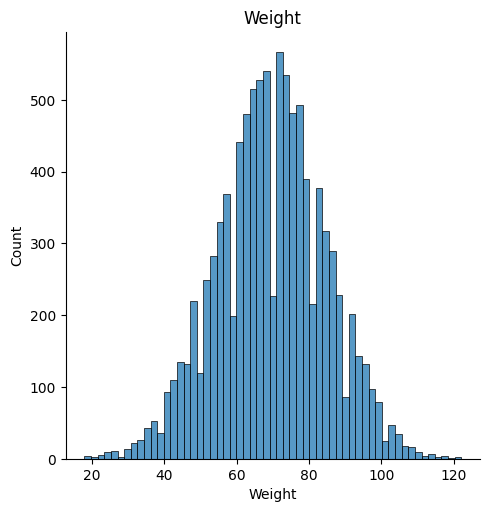

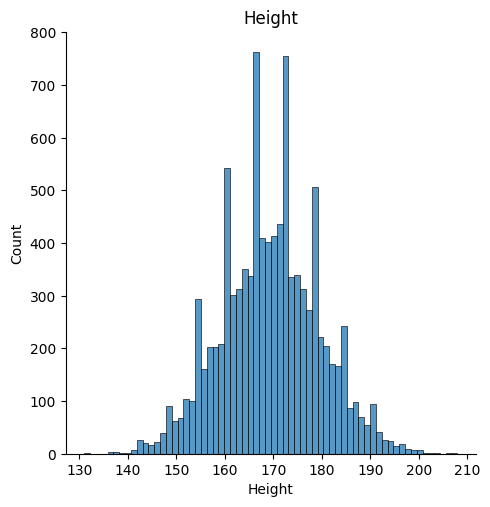

In [24]:
col = ['Age', 'Weight', 'Height']

def plot_bar_graph():
    for c in col:
        sns.displot(data[c])
        plt.title(c)
        plt.show()

plot_bar_graph()